In [34]:


# !pip install roboflow
# from roboflow import Roboflow
# rf = Roboflow(api_key="QnnzsdXPEsvcmyZQsec6")
# project = rf.workspace("ws-qwbuh").project("constellation-dsphi")
# version = project.version(1)
# dataset = version.download("yolov11")


In [35]:


# !pip install ultralytics
# !pip install seaborn
from ultralytics import YOLO
import cv2
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import random
import yaml



In [36]:


dataset_path = "Constellation-1"

train_path = dataset_path + "/train"
valid_path = dataset_path + "/valid"
test_path = dataset_path + "/test"

train_imgs = train_path + "/images"
valid_imgs = valid_path + "/images"
test_imgs = test_path + "/images"

train_labels = train_path + "/labels"
valid_labels = valid_path + "/labels"
test_labels = test_path + "/labels"



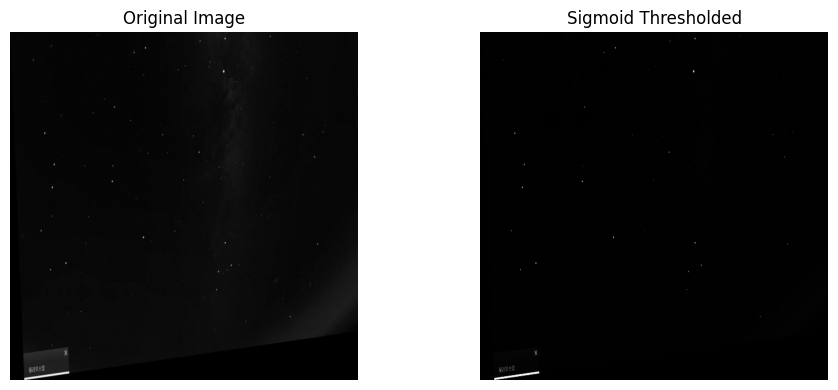

Constellation-1/train/images/2022-06-28-00-00-00-n_png_jpg.rf.9dc73855987ee1d5aadd8cc4136bb4fc.jpg


In [37]:
# Get a random image from the train folder
image_files = [f for f in os.listdir(train_imgs) if f.lower().endswith(('.png', '.jpg', '.jpeg'))]
if not image_files:
    raise ValueError("No image files found in the training directory.")
random_image_file = random.choice(image_files)
image_path = os.path.join(train_imgs, random_image_file)

# Load image in grayscale
original = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Apply sigmoid contrast enhancement
# You can tweak gain and cutoff to control the steepness and center of the curve
def sigmoid_contrast(img, gain=10, cutoff=128):
    '''
    El parámetro gain controla la pendiente de la curva sigmoide: un valor más alto hace que la transición sea más abrupta.
    El parámetro cutoff determina el punto central de la curva: valores más altos desplazan la curva hacia la derecha, 
    haciendo que sea más difícil que los píxeles más oscuros se vuelvan claros.
    '''
    img = img.astype(np.float32)
    sigmoid = 255 / (1 + np.exp(-gain * (img - cutoff) / 255.0))
    return np.uint8(sigmoid)

transformed = sigmoid_contrast(original, gain=10, cutoff=128)

plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.title("Original Image")
plt.imshow(original, cmap='gray')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title("Sigmoid Thresholded")
plt.imshow(transformed, cmap='gray')
plt.axis('off')

plt.tight_layout()
plt.show()

print(image_path)



In [38]:
processed_path = "Constellation-1/processed"

train_path_p = processed_path + "/train"
valid_path_p = processed_path + "/valid"
test_path_p = processed_path + "/test"

train_imgs_p = train_path_p + "/images"
valid_imgs_p = valid_path_p + "/images"
test_imgs_p = test_path_p + "/images"

train_labels_p = train_path_p + "/labels"
valid_labels_p = valid_path_p + "/labels"
test_labels_p = test_path_p + "/labels"

In [39]:
# model = YOLO("yolo11n.pt") # YOLO 11 nano (más chico = más rápido, menos preciso)

# results = model.train(
#                     data="Constellation-1/data.yaml",
#                     epochs=10,
#                     imgsz=640,
#                     batch=16,
#                     name='constellation-detector'
#                 )

In [41]:
model = YOLO("runs/detect/constellation-detector2/weights/best.pt")


image 1/1 /home/nicouwu/Documentos/Vision/TPF-VisionArtificial/Constellation-1/test/images/2022-09-07-00-00-00-n_png_jpg.rf.73509d055788f091cef8d6b91e5d185b.jpg: 640x640 1 cassiopeia, 2 pleiadess, 19.5ms
Speed: 3.8ms preprocess, 19.5ms inference, 4.1ms postprocess per image at shape (1, 3, 640, 640)


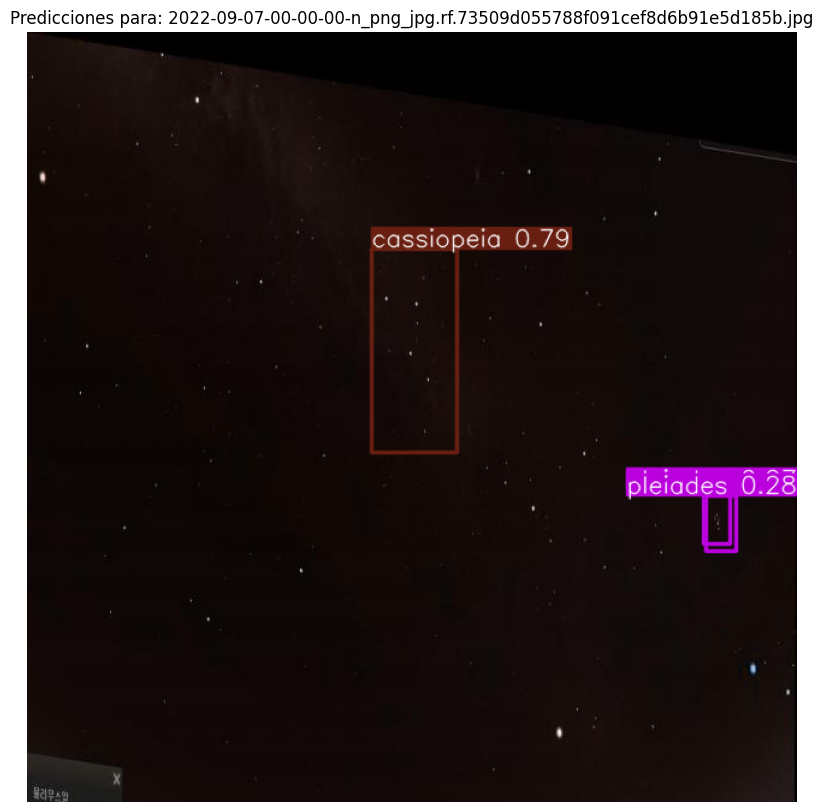

In [42]:
# Get a random image from the test folder
image_files = [f for f in os.listdir(test_imgs) if f.lower().endswith(('.png', '.jpg', '.jpeg'))]
if not image_files:
    raise ValueError("No image files found in the training directory.")
random_image_file = random.choice(image_files)
image_path = os.path.join(test_imgs, random_image_file)

result0 = model(image_path)

# Visualizar con matplotlib
plt.figure(figsize=(10, 10))
plt.imshow(result0[0].plot())  # Devuelve un array con la imagen ploteada
plt.axis('off')
plt.title(f"Predicciones para: {random_image_file}")
plt.show()

Procesando imagen: imgs_lolo/orion.jpg

image 1/1 /Users/mateolopezv/Documents/UdeSA/Visión artificial/TPs/TP Final/imgs_lolo/orion.jpg: 480x640 (no detections), 67.6ms
Speed: 11.2ms preprocess, 67.6ms inference, 0.5ms postprocess per image at shape (1, 3, 480, 640)


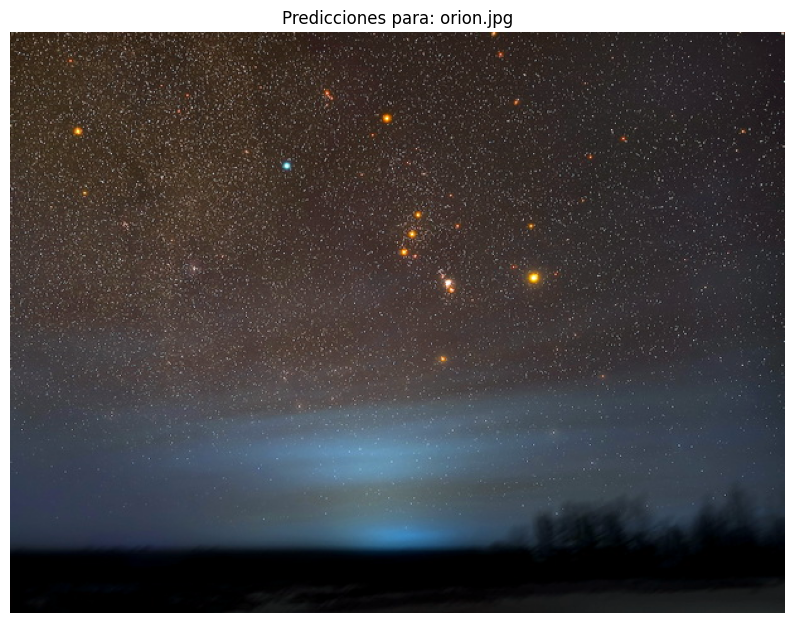

Procesando imagen: imgs_lolo/WhatsApp Image 2025-05-29 at 19.32.33 (1).jpeg

image 1/1 /Users/mateolopezv/Documents/UdeSA/Visión artificial/TPs/TP Final/imgs_lolo/WhatsApp Image 2025-05-29 at 19.32.33 (1).jpeg: 640x480 1 ursa_major, 39.4ms
Speed: 1.7ms preprocess, 39.4ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 480)


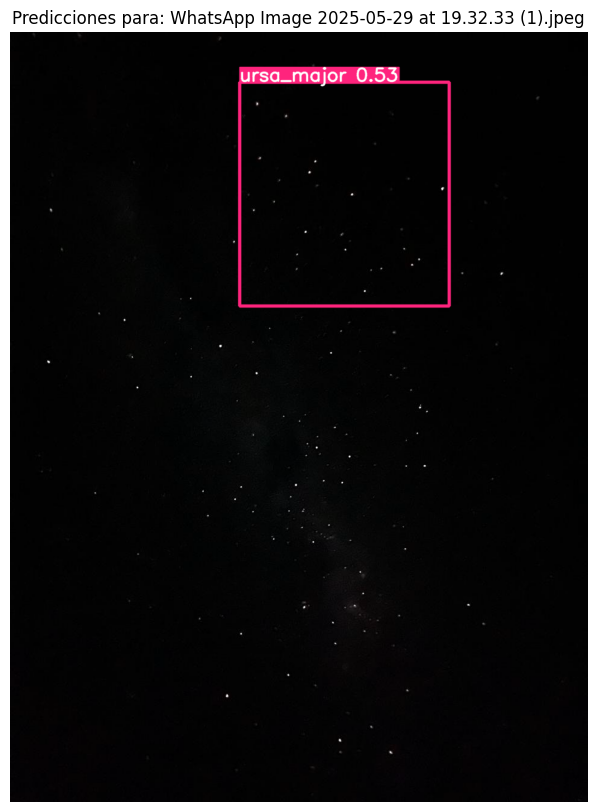

Procesando imagen: imgs_lolo/ursa.jpg

image 1/1 /Users/mateolopezv/Documents/UdeSA/Visión artificial/TPs/TP Final/imgs_lolo/ursa.jpg: 640x576 1 leo, 48.3ms
Speed: 1.6ms preprocess, 48.3ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 576)


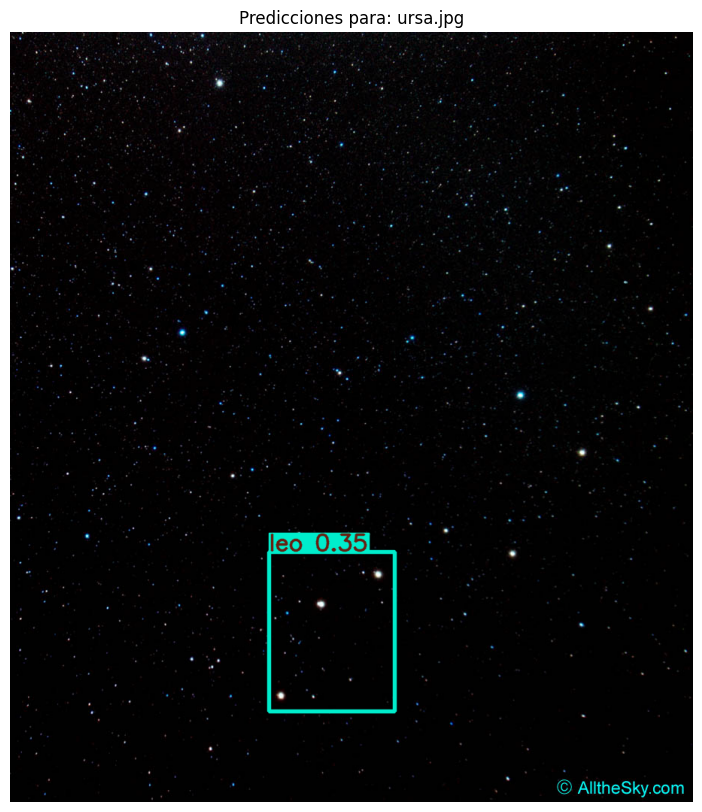

In [ ]:
imgs_lolo = [f for f in os.listdir("imgs_lolo") if f.lower().endswith(('.png', '.jpg', '.jpeg'))]
for img in imgs_lolo:
    image_path = os.path.join("imgs_lolo", img)
    print(f"Procesando imagen: {image_path}")
    result = model(image_path)
    plt.figure(figsize=(10, 10))
    plt.imshow(result[0].plot())  # Devuelve un array con la imagen ploteada
    plt.axis('off')
    plt.title(f"Predicciones para: {img}")
    plt.show()